### Imports

In [1]:
# Remove unwanted warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# Data Management
import pandas as pd
import numpy as np
from itertools import compress

from ta import add_all_ta_features

# Statistics
from statsmodels.tsa.stattools import adfuller

# Unsupervised Machine Learning
from sklearn.decomposition import PCA

# Supervised Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import pickle 


# Reporting
import matplotlib.pyplot as plt
import yfinance

In [2]:
findFeature = True
#[OLECTRA,"LT","CONCOR","ELGIEQUIP","IOC","BEL","TATAELXSI","^NSEI"]
#["RELI","HDFCBANK.NS","TATAMOTORS.NS","SBIN.NS","TCS.NS","TITAN.NS","SUNPHARMA.BO","TECHM.NS", "ASIANPAINT.NS","TATACONSUM.NS"]
stock_name = "TATACONSUM.NS"
isForex = False
disableStationaryCheck = False
features = []
if findFeature == False:
    with open('./TrainedModel/indicator/{}_features.txt'.format(stock_name), 'rb') as f:
            features = pickle.load(f)
           # print(feature_item)
            features.append("TARGET")



### Initial Data Extraction

In [3]:


# Data Extraction
start_date = "2017-01-01"
end_date = "2022-06-01"
#symbol = "IOC.NS"

#df = yfinance.download(tickers = stock_name,start="2010-03-06",
 #                              interval = "1d", group_by = 'ticker', auto_adjust = True)

df = pd.read_csv("./stock_historical_data/{}.csv".format(stock_name))
df.set_index("Date", inplace=True)

df = df[["Open", "High", "Low", "Close","Volume"]]
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2023-07-10,841.500000,841.500000,822.000000,825.650024,1177214
2023-07-11,826.000000,843.000000,825.750000,840.299988,2167322
2023-07-12,844.950012,847.799988,838.799988,843.250000,1435731
2023-07-13,847.000000,849.000000,835.200012,837.349976,985928
2023-07-14,838.950012,852.750000,833.599976,851.500000,1704921


In [4]:
# Add TA
df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)


In [5]:
import talib


In [6]:
candle_names = talib.get_function_groups()['Pattern Recognition']
#candle_names

In [7]:
df

,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,77.434599,78.254013,76.955243,77.782852,952740,2.614808e+05,952740,0.274451,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.782852,-71.810198,0.000000,0.000000
2010-01-05,78.254011,86.231004,77.926244,83.813736,7061550,3.212217e+06,8014290,0.400811,4.258739e+07,526.165874,...,0.614980,0.122996,0.491984,34.678129,6.935626,27.742503,80.413725,7.753488,7.467591,7.753488
2010-01-06,84.563491,85.907329,82.285522,85.124794,2960980,4.893686e+06,10975270,0.445883,3.705805e+07,246.813175,...,1.215548,0.341506,0.874042,35.281236,12.604748,22.676488,82.410459,1.564252,1.552144,9.439024
2010-01-07,86.030254,87.513397,84.645449,85.423889,3807800,3.152971e+06,14783070,0.213283,3.192674e+07,149.354814,...,1.694996,0.612204,1.082791,37.657484,17.615295,20.042189,83.683315,0.351361,0.350745,9.823550
2010-01-08,85.792617,88.066491,85.309166,85.849976,2940330,1.366048e+06,17723400,0.077076,2.754475e+07,57.053898,...,2.087256,0.907215,1.180041,35.804175,21.253071,14.551104,84.571287,0.498791,0.497551,10.371339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-10,841.500000,841.500000,822.000000,825.650024,1177214,-1.315253e+08,1174062227,0.087430,-3.287085e+05,-17227.104076,...,1.198205,1.922870,-0.724665,-0.858071,-0.069066,-0.789005,841.127889,-0.912088,-0.916273,961.480778
2023-07-11,826.000000,843.000000,825.750000,840.299988,2167322,-1.300364e+08,1176229549,0.183509,4.254134e+06,2089.271922,...,1.077482,1.753792,-0.676310,1.892343,0.323216,1.569127,841.067179,1.774355,1.758797,980.315216
2023-07-12,844.950012,847.799988,838.799988,843.250000,1435731,-1.300524e+08,1177665280,0.126168,4.251461e+06,5594.703335,...,0.998580,1.602750,-0.604170,0.508958,0.360364,0.148594,841.134211,0.351067,0.350452,984.107842


In [8]:
# extract OHLC 
op = df['Open']
hi = df['High']
lo = df['Low']
cl = df['Close']
# create columns for each pattern
for candle in candle_names:
    # below is same as;
    # df["CDL3LINESTRIKE"] = talib.CDL3LINESTRIKE(op, hi, lo, cl)
    df[candle] = getattr(talib, candle)(op, hi, lo, cl)

/var/folders/4_/_fbkdkz531s_92lxx_c_x6n00000gn/T/ipykernel_11935/357509093.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[candle] = getattr(talib, candle)(op, hi, lo, cl)
/var/folders/4_/_fbkdkz531s_92lxx_c_x6n00000gn/T/ipykernel_11935/357509093.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[candle] = getattr(talib, candle)(op, hi, lo, cl)
/var/folders/4_/_fbkdkz531s_92lxx_c_x6n00000gn/T/ipykernel_11935/357509093.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

In [9]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'volume_adi', 'volume_obv',
       'volume_cmf', 'volume_fi', 'volume_em',
       ...
       'CDLSPINNINGTOP', 'CDLSTALLEDPATTERN', 'CDLSTICKSANDWICH', 'CDLTAKURI',
       'CDLTASUKIGAP', 'CDLTHRUSTING', 'CDLTRISTAR', 'CDLUNIQUE3RIVER',
       'CDLUPSIDEGAP2CROWS', 'CDLXSIDEGAP3METHODS'],
      dtype='object', length=152)

In [10]:
candle_rankings = {
        "CDL3LINESTRIKE_Bull": 1,
        "CDL3LINESTRIKE_Bear": 2,
        "CDL3BLACKCROWS_Bull": 3,
        "CDL3BLACKCROWS_Bear": 3,
        "CDLEVENINGSTAR_Bull": 4,
        "CDLEVENINGSTAR_Bear": 4,
        "CDLTASUKIGAP_Bull": 5,
        "CDLTASUKIGAP_Bear": 5,
        "CDLINVERTEDHAMMER_Bull": 6,
        "CDLINVERTEDHAMMER_Bear": 6,
        "CDLMATCHINGLOW_Bull": 7,
        "CDLMATCHINGLOW_Bear": 7,
        "CDLABANDONEDBABY_Bull": 8,
        "CDLABANDONEDBABY_Bear": 8,
        "CDLBREAKAWAY_Bull": 10,
        "CDLBREAKAWAY_Bear": 10,
        "CDLMORNINGSTAR_Bull": 12,
        "CDLMORNINGSTAR_Bear": 12,
        "CDLPIERCING_Bull": 13,
        "CDLPIERCING_Bear": 13,
        "CDLSTICKSANDWICH_Bull": 14,
        "CDLSTICKSANDWICH_Bear": 14,
        "CDLTHRUSTING_Bull": 15,
        "CDLTHRUSTING_Bear": 15,
        "CDLINNECK_Bull": 17,
        "CDLINNECK_Bear": 17,
        "CDL3INSIDE_Bull": 20,
        "CDL3INSIDE_Bear": 56,
        "CDLHOMINGPIGEON_Bull": 21,
        "CDLHOMINGPIGEON_Bear": 21,
        "CDLDARKCLOUDCOVER_Bull": 22,
        "CDLDARKCLOUDCOVER_Bear": 22,
        "CDLIDENTICAL3CROWS_Bull": 24,
        "CDLIDENTICAL3CROWS_Bear": 24,
        "CDLMORNINGDOJISTAR_Bull": 25,
        "CDLMORNINGDOJISTAR_Bear": 25,
        "CDLXSIDEGAP3METHODS_Bull": 27,
        "CDLXSIDEGAP3METHODS_Bear": 26,
        "CDLTRISTAR_Bull": 28,
        "CDLTRISTAR_Bear": 76,
        "CDLGAPSIDESIDEWHITE_Bull": 46,
        "CDLGAPSIDESIDEWHITE_Bear": 29,
        "CDLEVENINGDOJISTAR_Bull": 30,
        "CDLEVENINGDOJISTAR_Bear": 30,
        "CDL3WHITESOLDIERS_Bull": 32,
        "CDL3WHITESOLDIERS_Bear": 32,
        "CDLONNECK_Bull": 33,
        "CDLONNECK_Bear": 33,
        "CDL3OUTSIDE_Bull": 34,
        "CDL3OUTSIDE_Bear": 39,
        "CDLRICKSHAWMAN_Bull": 35,
        "CDLRICKSHAWMAN_Bear": 35,
        "CDLSEPARATINGLINES_Bull": 36,
        "CDLSEPARATINGLINES_Bear": 40,
        "CDLLONGLEGGEDDOJI_Bull": 37,
        "CDLLONGLEGGEDDOJI_Bear": 37,
        "CDLHARAMI_Bull": 38,
        "CDLHARAMI_Bear": 72,
        "CDLLADDERBOTTOM_Bull": 41,
        "CDLLADDERBOTTOM_Bear": 41,
        "CDLCLOSINGMARUBOZU_Bull": 70,
        "CDLCLOSINGMARUBOZU_Bear": 43,
        "CDLTAKURI_Bull": 47,
        "CDLTAKURI_Bear": 47,
        "CDLDOJISTAR_Bull": 49,
        "CDLDOJISTAR_Bear": 51,
        "CDLHARAMICROSS_Bull": 50,
        "CDLHARAMICROSS_Bear": 80,
        "CDLADVANCEBLOCK_Bull": 54,
        "CDLADVANCEBLOCK_Bear": 54,
        "CDLSHOOTINGSTAR_Bull": 55,
        "CDLSHOOTINGSTAR_Bear": 55,
        "CDLMARUBOZU_Bull": 71,
        "CDLMARUBOZU_Bear": 57,
        "CDLUNIQUE3RIVER_Bull": 60,
        "CDLUNIQUE3RIVER_Bear": 60,
        "CDL2CROWS_Bull": 61,
        "CDL2CROWS_Bear": 61,
        "CDLBELTHOLD_Bull": 62,
        "CDLBELTHOLD_Bear": 63,
        "CDLHAMMER_Bull": 65,
        "CDLHAMMER_Bear": 65,
        "CDLHIGHWAVE_Bull": 67,
        "CDLHIGHWAVE_Bear": 67,
        "CDLSPINNINGTOP_Bull": 69,
        "CDLSPINNINGTOP_Bear": 73,
        "CDLUPSIDEGAP2CROWS_Bull": 74,
        "CDLUPSIDEGAP2CROWS_Bear": 74,
        "CDLGRAVESTONEDOJI_Bull": 77,
        "CDLGRAVESTONEDOJI_Bear": 77,
        "CDLHIKKAKEMOD_Bull": 82,
        "CDLHIKKAKEMOD_Bear": 81,
        "CDLHIKKAKE_Bull": 85,
        "CDLHIKKAKE_Bear": 83,
        "CDLENGULFING_Bull": 84,
        "CDLENGULFING_Bear": 91,
        "CDLMATHOLD_Bull": 86,
        "CDLMATHOLD_Bear": 86,
        "CDLHANGINGMAN_Bull": 87,
        "CDLHANGINGMAN_Bear": 87,
        "CDLRISEFALL3METHODS_Bull": 94,
        "CDLRISEFALL3METHODS_Bear": 89,
        "CDLKICKING_Bull": 96,
        "CDLKICKING_Bear": 102,
        "CDLDRAGONFLYDOJI_Bull": 98,
        "CDLDRAGONFLYDOJI_Bear": 98,
        "CDLCONCEALBABYSWALL_Bull": 101,
        "CDLCONCEALBABYSWALL_Bear": 101,
        "CDL3STARSINSOUTH_Bull": 103,
        "CDL3STARSINSOUTH_Bear": 103,
        "CDLDOJI_Bull": 104,
        "CDLDOJI_Bear": 104,
        "CDLSHORTLINE_Bear":104,
        "CDLLONGLINE_Bear":104,
        "CDLLONGLINE_Bull": 105,
        "CDLSHORTLINE_Bull":106,
        "CDLSTALLEDPATTERN_Bear":107,
        "CDLCOUNTERATTACK_Bear":108
    }

In [11]:
 if 1==1:
    df['candlestick_pattern'] = np.nan
    df['candlestick_match_count'] = np.nan
    for index, row in df.iterrows():

        # no pattern found
        if len(row[candle_names]) - sum(row[candle_names] == 0) == 0:
            df.loc[index,'candlestick_pattern'] = "NO_PATTERN"
            df.loc[index, 'candlestick_match_count'] = 0
        # single pattern found
        elif len(row[candle_names]) - sum(row[candle_names] == 0) == 1:
            # bull pattern 100 or 200
            if any(row[candle_names].values > 0):
                pattern = list(compress(row[candle_names].keys(), row[candle_names].values != 0))[0] + '_Bull'
                df.loc[index, 'candlestick_pattern'] = pattern
                df.loc[index, 'candlestick_match_count'] = 1
            # bear pattern -100 or -200
            else:
                pattern = list(compress(row[candle_names].keys(), row[candle_names].values != 0))[0] + '_Bear'
                df.loc[index, 'candlestick_pattern'] = pattern
                df.loc[index, 'candlestick_match_count'] = 1
        # multiple patterns matched -- select best performance
        else:
            # filter out pattern names from bool list of values
            patterns = list(compress(row[candle_names].keys(), row[candle_names].values != 0))
            container = []
            for pattern in patterns:
                if row[pattern] > 0:
                    container.append(pattern + '_Bull')
                else:
                    container.append(pattern + '_Bear')
            rank_list = [candle_rankings[p] for p in container]
            if len(rank_list) == len(container):
                rank_index_best = rank_list.index(min(rank_list))
                df.loc[index, 'candlestick_pattern'] = container[rank_index_best]
                df.loc[index, 'candlestick_match_count'] = len(container)
    # clean up candle columns
    df.drop(candle_names, axis = 1, inplace = True)

/var/folders/4_/_fbkdkz531s_92lxx_c_x6n00000gn/T/ipykernel_11935/121105679.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['candlestick_pattern'] = np.nan
/var/folders/4_/_fbkdkz531s_92lxx_c_x6n00000gn/T/ipykernel_11935/121105679.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['candlestick_match_count'] = np.nan


In [12]:
result = []
for i in range(0,len(df)):
    if 1 == 1:
        #print(df.iloc[i].candlestick_pattern.find("_Bear"))
        if df.iloc[i].candlestick_pattern == "NO_PATTERN":
            result.append(0) 
        elif df.iloc[i].candlestick_pattern.find("_Bear") != -1:
            result.append(-1)
        elif df.iloc[i].candlestick_pattern.find("_Bull") != -1:
            result.append(1)
        else:
            result.append(0)

#print(result)

In [13]:
df["trend"] = result

In [17]:
df

,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,candlestick_pattern,candlestick_match_count,trend,weekday
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,77.434599,78.254013,76.955243,77.782852,952740,2.614808e+05,952740,0.274451,0.000000e+00,0.000000,...,0.000000,0.000000,77.782852,-71.810198,0.000000,0.000000,NO_PATTERN,0.0,0,0
2010-01-05,78.254011,86.231004,77.926244,83.813736,7061550,3.212217e+06,8014290,0.400811,4.258739e+07,526.165874,...,6.935626,27.742503,80.413725,7.753488,7.467591,7.753488,NO_PATTERN,0.0,0,1
2010-01-06,84.563491,85.907329,82.285522,85.124794,2960980,4.893686e+06,10975270,0.445883,3.705805e+07,246.813175,...,12.604748,22.676488,82.410459,1.564252,1.552144,9.439024,NO_PATTERN,0.0,0,2
2010-01-07,86.030254,87.513397,84.645449,85.423889,3807800,3.152971e+06,14783070,0.213283,3.192674e+07,149.354814,...,17.615295,20.042189,83.683315,0.351361,0.350745,9.823550,NO_PATTERN,0.0,0,3
2010-01-08,85.792617,88.066491,85.309166,85.849976,2940330,1.366048e+06,17723400,0.077076,2.754475e+07,57.053898,...,21.253071,14.551104,84.571287,0.498791,0.497551,10.371339,NO_PATTERN,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-10,841.500000,841.500000,822.000000,825.650024,1177214,-1.315253e+08,1174062227,0.087430,-3.287085e+05,-17227.104076,...,-0.069066,-0.789005,841.127889,-0.912088,-0.916273,961.480778,CDLBELTHOLD_Bear,1.0,-1,0
2023-07-11,826.000000,843.000000,825.750000,840.299988,2167322,-1.300364e+08,1176229549,0.183509,4.254134e+06,2089.271922,...,0.323216,1.569127,841.067179,1.774355,1.758797,980.315216,CDLBELTHOLD_Bull,1.0,1,1
2023-07-12,844.950012,847.799988,838.799988,843.250000,1435731,-1.300524e+08,1177665280,0.126168,4.251461e+06,5594.703335,...,0.360364,0.148594,841.134211,0.351067,0.350452,984.107842,CDLSPINNINGTOP_Bear,1.0,-1,2


In [20]:
df = df.drop('candlestick_pattern',axis=1)

In [14]:
df['date'] = pd.to_datetime(df.index)


In [15]:
df['weekday'] = df['date'].dt.weekday
df = df.drop('date', axis=1)


### Data Preprocessing - Stationarity

In [21]:
# Identify non-stationary columns
if isForex == True:
    needToRmv =["Volume","volume_nvi","momentum_pvo","momentum_pvo_signal","momentum_pvo_hist"
    ,"volume_adi","volume_obv","volume_cmf","volume_fi","volume_em","volume_sma_em","volume_vpt","volume_vwap","volume_mfi"]
    df= df.drop(needToRmv,axis=1)

    
non_stationaries = []
for col in df.columns:
    #print(col)
    dftest = adfuller(df[col].values)
    p_value = dftest[1]
    t_test = dftest[0] < dftest[4]["1%"]
    if p_value > 0.05 or not t_test:
        non_stationaries.append(col)
print(f"Non-Stationary Features Found: {len(non_stationaries)}")

Non-Stationary Features Found: 31


In [22]:
df_stationary = df.copy()
df_stationary[non_stationaries] = df_stationary[non_stationaries].pct_change()
df_stationary = df_stationary.iloc[1:]

In [23]:
# Find NaN Rows
na_list = df_stationary.columns[df_stationary.isna().any().tolist()]
df_stationary.drop(columns=na_list, inplace=True)

In [24]:
# Handle inf values
df_stationary.replace([np.inf, -np.inf], 0, inplace=True)
df_stationary.head()

,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,candlestick_match_count,trend,weekday
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,0.010582,0.101937,0.012618,0.077535,7061550,11.284716,7.411833,0.400811,4.258739e+07,526.165874,...,34.678129,6.935626,27.742503,0.033823,7.753488,7.467591,0.000000,0.0,0,1
2010-01-06,0.080628,-0.003754,0.055941,0.015643,2960980,0.523460,0.369463,0.445883,3.705805e+07,246.813175,...,35.281236,12.604748,22.676488,0.024831,1.564252,1.552144,0.217391,0.0,0,2
2010-01-07,0.017345,0.018695,0.028680,0.003514,3807800,-0.355706,0.346944,0.213283,3.192674e+07,149.354814,...,37.657484,17.615295,20.042189,0.015445,0.351361,0.350745,0.040738,0.0,0,3
2010-01-08,-0.002762,0.006320,0.007841,0.004988,2940330,-0.566743,0.198898,0.077076,2.754475e+07,57.053898,...,35.804175,21.253071,14.551104,0.010611,0.498791,0.497551,0.055763,0.0,0,4
2010-01-11,0.007641,-0.001628,0.005667,0.005631,1252350,-0.451331,0.070661,0.039498,2.369628e+07,28.924109,...,28.552212,22.712899,5.839313,0.008365,0.563136,0.561556,0.059929,0.0,0,0


### Data Preprocessing - Scaling and Target Setting

In [25]:
# Set Target (for Supervised ML later on)
df_stationary["TARGET"] = -1
df_stationary.loc[df_stationary["Close"].shift(-1) > df_stationary["Close"], "TARGET"] = 1
df_stationary.dropna(inplace=True)

In [26]:
features

[]

In [ ]:
# Convert non-stationaries to stationary
if findFeature == False:
    df_stationary = df_stationary[features]
print(df_stationary)

In [27]:
# Split Target from Featureset
X = df_stationary.iloc[:, :-1]
y = df_stationary.iloc[:, -1]

In [28]:
# Feature Scaling
df_sc = df_stationary.copy()
X_fs = StandardScaler().fit_transform(X)

In [29]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_fs, y, test_size=0.7, random_state=42)

In [30]:
print(len(X_train),"Y test :",len(y_test))

1002 Y test : 2338


### Unsupervised ML - PCA Dimensionality Reduction

### Supervised ML - Random Forest Classification

In [33]:
classifier = RandomForestClassifier(n_estimators=12, max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")

Test Accuracy: 0.7668947818648417
Test Precision: 0.7762430939226519


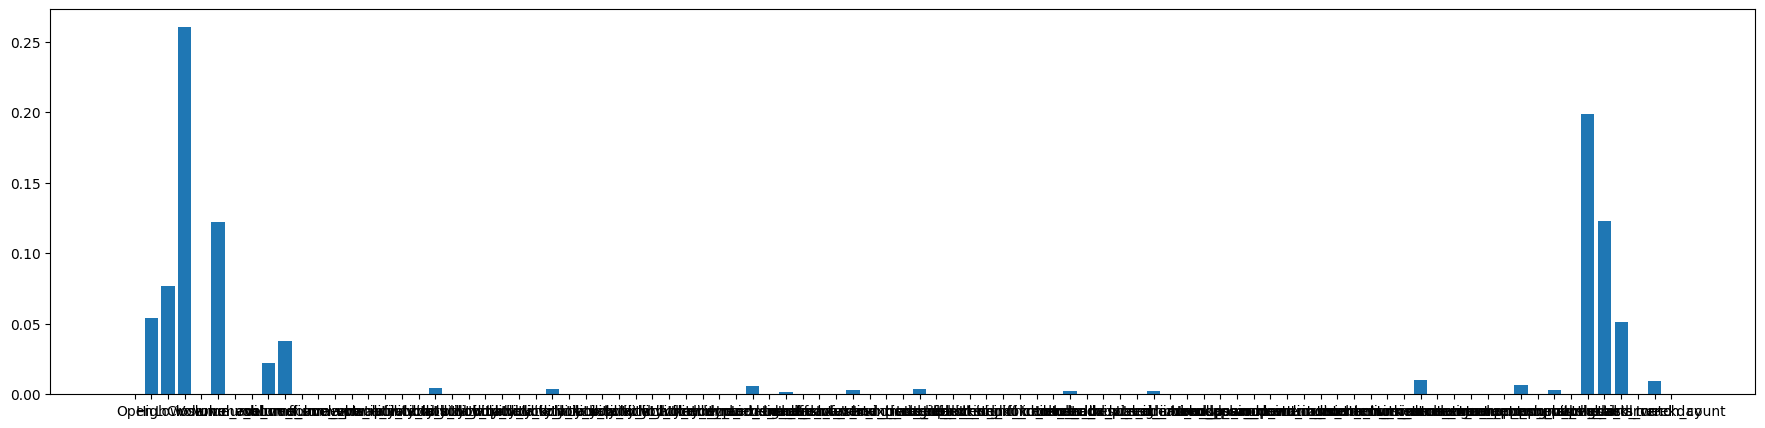

In [34]:
# Plot Feature Importances
fig = plt.figure(figsize=(22, 5))
importance_labels = X.columns
importance_features = classifier.feature_importances_
plt.bar(importance_labels, importance_features)
plt.show()

In [35]:
# Select Best Features
mean_feature_importance = importance_features.mean()
i = 0
recommended_feature_labels = []
recommended_feature_score = []
for fi in importance_features:
    if fi > mean_feature_importance:
        recommended_feature_labels.append(importance_labels[i])
        recommended_feature_score.append(fi)
    i += 1

/var/folders/4_/_fbkdkz531s_92lxx_c_x6n00000gn/T/ipykernel_11935/3002898103.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


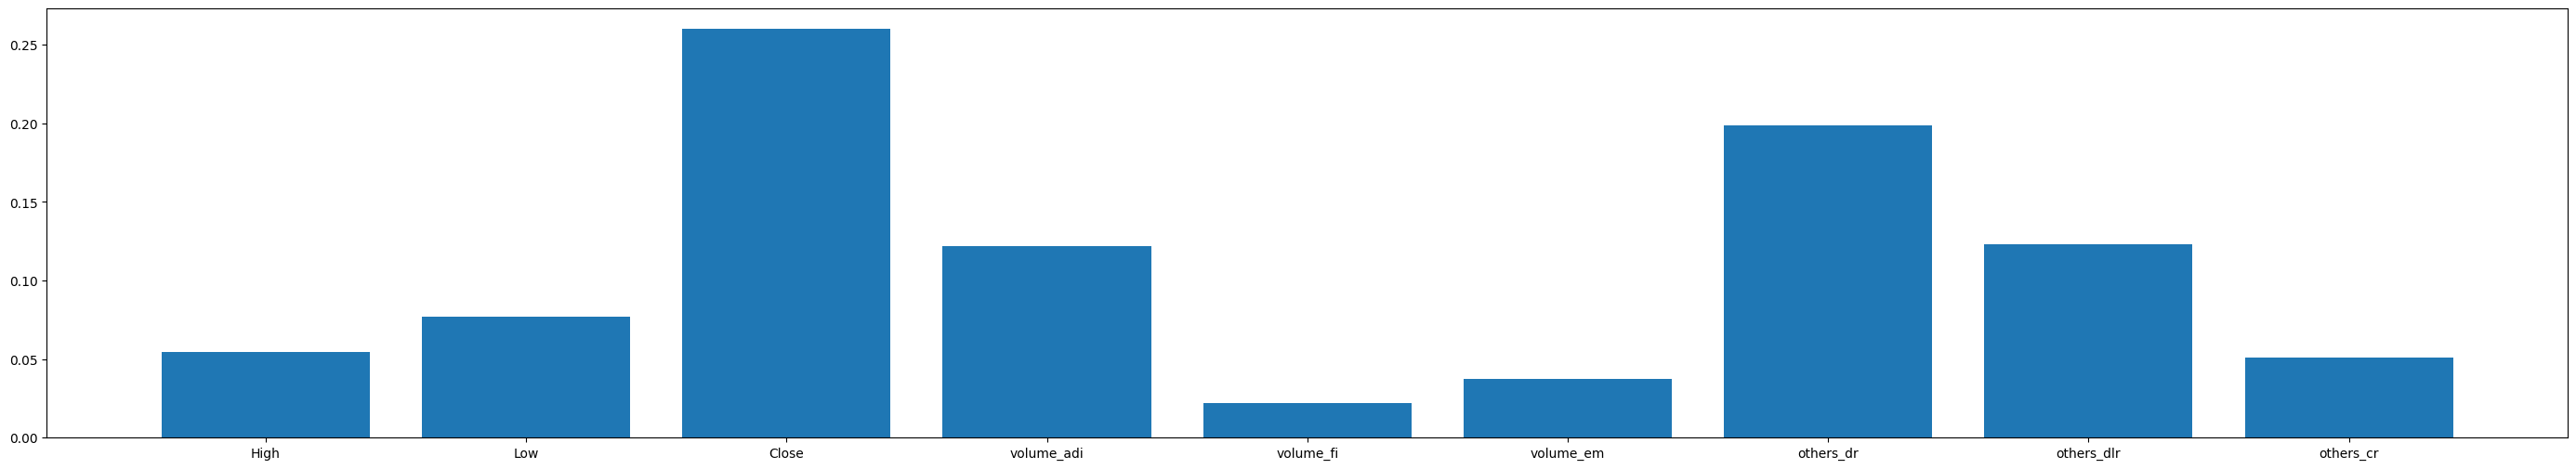

In [36]:
fig, ax = plt.subplots(figsize=(35, 6))

ax.bar(recommended_feature_labels, recommended_feature_score)
fig.show()

In [ ]:
y_pred_proba = classifier.predict_proba(X_test)
y_pred_proba

In [ ]:
# Test for Overfitting
train_scores, test_scores = list(), list()

values = [i for i in range(1, 200)]
for i in values:
    classifier = {}
    classifier = RandomForestClassifier(n_estimators=i, max_depth=2, random_state=0)
   
    #with open('./TrainedModel/indicator/{}_model_2.pkl'.format(stock_name), 'rb') as f:
     #   classifier = pickle.load(f)
        
    classifier.fit(X_train, y_train)
    
    # Training Data
    y_train_pred = classifier.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    train_scores.append(accuracy_train)
    
    # Test Data
    y_test_pred = classifier.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    test_scores.append(accuracy_test)

In [ ]:
test_scores

In [ ]:
# Plot Results
plt.plot(train_scores)
plt.plot(test_scores)
plt.show()

In [ ]:
# Save the trained model to a file
import pickle

if findFeature == False:
    with open('./TrainedModel/indicator/{}_model_2.pkl'.format(stock_name), 'wb') as f:
        pickle.dump(classifier, f)

In [ ]:
# Save the trained model to a file
if findFeature == True:
    print(recommended_feature_labels)
    with open('./TrainedModel/indicator/{}_features.txt'.format(stock_name), 'wb') as f:
        pickle.dump(recommended_feature_labels, f)